In [11]:
import os
import cv2
import numpy as np

def load_data(data_dir):
    images = []
    masks = []

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Data directory does not exist: {data_dir}")
        return None, None

    for filename in os.listdir(data_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust based on your image format
            image_path = os.path.join(data_dir, filename)

            # Construct the corresponding mask filename
            mask_filename = filename + "_mask.jpg"  # Adjust the extension if needed
            mask_path = os.path.join(data_dir, mask_filename)

            if os.path.exists(mask_path):
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

                images.append(image)
                masks.append(mask)
            else:
                print(f"Missing mask for: {filename}")

    return np.array(images), np.array(masks)

# Specify your dataset directory
data_dir = r"C:\Users\Admin\Desktop\brain mri\Data\TCGA_CS_4941_19960909"  # Use raw string to avoid escape issues
images, masks = load_data(data_dir)

# Optionally, check the shapes of loaded images and masks
if images is not None and masks is not None:
    print(f"Loaded {len(images)} images and {len(masks)} masks.")


Loaded 0 images and 0 masks.


In [12]:
!pip install opencv-python


In [13]:
!pip install scikit-learn


In [14]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(image_dir, mask_dir):
    images = []
    masks = []

    for filename in os.listdir(image_dir):
        image_path = os.path.join(image_dir, filename)
        mask_path = os.path.join(mask_dir, filename)

        if os.path.exists(image_path) and os.path.exists(mask_path):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            images.append(image)
            masks.append(mask)

    return np.array(images), np.array(masks)

image_dir = "../dataset/images/"
mask_dir = "../dataset/masks/"

images, masks = load_data(image_dir, mask_dir)


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../dataset/images/'

In [ ]:
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# Apply CLAHE to all images
images = np.array([apply_clahe(img) for img in images])


In [ ]:
def normalize(images):
    return images / 255.0  # Normalize to [0, 1]

# Normalize images
images = normalize(images)
masks = normalize(masks)

# Split the dataset
train_images, test_images, train_masks, test_masks = train_test_split(
    images, masks, test_size=0.2, random_state=42
)


In [ ]:
import os
import cv2
import numpy as np

def load_data(data_dir):
    images = []
    masks = []

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Data directory does not exist: {data_dir}")
        return None, None

    for filename in os.listdir(data_dir):
        print(f"Processing file: {filename}")  # Debugging line

        # Check for supported image formats
        if filename.endswith(('.jpg', '.jpeg', '.png', '.tif')):  # Add other formats if necessary
            image_path = os.path.join(data_dir, filename)

            # Construct the corresponding mask filename
            mask_filename = filename.replace('.tif', '_mask.tif')  # Adjust if needed
            mask_path = os.path.join(data_dir, mask_filename)

            if os.path.exists(mask_path):
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

                images.append(image)
                masks.append(mask)
            else:
                print(f"Missing mask for: {filename}")

    return np.array(images), np.array(masks)

# Specify your dataset directory
data_dir = r"C:\Users\Admin\Desktop\brain mri\dataset"
images, masks = load_data(data_dir)

# Optionally, check the shapes of loaded images and masks
if images is not None and masks is not None:
    print(f"Loaded {len(images)} images and {len(masks)} masks.")


In [ ]:
def preprocess_images(images):
    processed_images = []
    for image in images:
        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_image = clahe.apply(image)
        
        # Normalize the image
        normalized_image = clahe_image / 255.0  # Normalize to [0, 1]
        
        processed_images.append(normalized_image)
    return np.array(processed_images)

# Preprocess the loaded images
processed_images = preprocess_images(images)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_images, test_images, train_masks, test_masks = train_test_split(processed_images, masks, test_size=0.2, random_state=42)
print(f"Training images: {len(train_images)}, Training masks: {len(train_masks)}")
print(f"Testing images: {len(test_images)}, Testing masks: {len(test_masks)}")


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

# Example for a simple U-Net model
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)
    # Define your U-Net architecture here
    # ...

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(last_layer)  # Change as necessary
    model = Model(inputs, outputs)
    return model


In [ ]:
pip install tensorflow



In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)  # This will print the TensorFlow version

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

# Example for a simple U-Net model
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)
    # Define your U-Net architecture here
    # ...

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(last_layer)  # Change as necessary
    model = Model(inputs, outputs)
    return model


In [ ]:
model = unet_model(input_size=(256, 256, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_masks, validation_split=0.2, epochs=50, batch_size=16)


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_masks)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Calculate DICE Score
def dice_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-6)

# Assuming binary segmentation, threshold predictions
predictions = model.predict(test_images)
predictions = (predictions > 0.5).astype(np.uint8)

dice = dice_score(test_masks, predictions)
print(f"DICE Score: {dice}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def nested_unet(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)
    
    # Encoder path
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    # Decoder path
    up6 = UpSampling2D(size=(2, 2))(conv5)
    merge6 = concatenate([up6, conv4])
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    merge7 = concatenate([up7, conv3])
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    merge8 = concatenate([up8, conv2])
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    merge9 = concatenate([up9, conv1])
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv9)  # Sigmoid activation for binary segmentation

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Create the model
nested_unet_model = nested_unet()
nested_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.layers import Multiply, Activation

def attention_block(x, g):
    g = Conv2D(x.shape[-1], (1, 1))(g)
    x = Conv2D(x.shape[-1], (1, 1))(x)
    
    # Add and activate
    attention_coefficients = Activation('sigmoid')(Add()([x, g]))
    return Multiply()([x, attention_coefficients])

def attention_unet(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)
    # Define the encoder path (similar to U-Net)...
    # Use the attention_block at the merge points in the decoder path
    
    # Example merge point:
    up6 = UpSampling2D(size=(2, 2))(conv5)  # conv5 from encoder
    merge6 = concatenate([up6, conv4])  # conv4 from encoder
    attention6 = attention_block(conv4, up6)  # Apply attention
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(attention6)
    # Continue defining the model...
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Create the model
attention_unet_model = attention_unet()
attention_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train Nested U-Net
history_nested = nested_unet_model.fit(train_images, train_masks, 
                                        validation_split=0.2, 
                                        epochs=50, 
                                        batch_size=16)

# Train Attention U-Net
history_attention = attention_unet_model.fit(train_images, train_masks, 
                                              validation_split=0.2, 
                                              epochs=50, 
                                              batch_size=16)


In [ ]:
# Evaluate Nested U-Net
test_loss, test_accuracy = nested_unet_model.evaluate(test_images, test_masks)
print(f"Nested U-Net - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Evaluate Attention U-Net
test_loss, test_accuracy = attention_unet_model.evaluate(test_images, test_masks)
print(f"Attention U-Net - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# DICE Score calculation
def calculate_dice(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-6)

# Threshold predictions and calculate DICE scores
nested_predictions = (nested_unet_model.predict(test_images) > 0.5).astype(np.uint8)
attention_predictions = (attention_unet_model.predict(test_images) > 0.5).astype(np.uint8)

dice_nested = calculate_dice(test_masks, nested_predictions)
dice_attention = calculate_dice(test_masks, attention_predictions)

print(f"Nested U-Net DICE Score: {dice_nested}")
print(f"Attention U-Net DICE Score: {dice_attention}")


In [ ]:
pip install fastapi uvicorn

In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
import numpy as np

app = FastAPI()

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    # Load and preprocess the uploaded image
    # Use your model to make predictions
    # Return predictions
    return JSONResponse(content={"message": "Prediction results"})


In [ ]:
import streamlit as st
import requests
from PIL import Image

st.title("Brain MRI Metastasis Segmentation")
uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    
    if st.button("Predict"):
        # Send the image to the FastAPI endpoint and get predictions
        # Display results
        st.write("Prediction results will be shown here.")


In [ ]:
# Assuming you have already defined nested_unet_model and attention_unet_model
# and loaded train_images and train_masks

# Train Nested U-Net
history_nested = nested_unet_model.fit(train_images, train_masks,
                                        validation_split=0.2,
                                        epochs=50,
                                        batch_size=16)

# Train Attention U-Net
history_attention = attention_unet_model.fit(train_images, train_masks,
                                              validation_split=0.2,
                                              epochs=50,
                                              batch_size=16)


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Attention

# Example definition for Nested U-Net
def nested_unet(input_shape):
    inputs = Input(input_shape)
    # Define U-Net architecture here...
    # For simplicity, we will create a basic structure here
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    # More layers...
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(p1)  # Adjust for your output requirements
    return Model(inputs, outputs)

# Example definition for Attention U-Net
def attention_unet(input_shape):
    inputs = Input(input_shape)
    # Define Attention U-Net architecture here...
    # For simplicity, we will create a basic structure here
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    # More layers...
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(p1)  # Adjust for your output requirements
    return Model(inputs, outputs)

# Set input shape (adjust according to your data)
input_shape = (256, 256, 1)  # For grayscale images of size 256x256
nested_unet_model = nested_unet(input_shape)
attention_unet_model = attention_unet(input_shape)


In [ ]:
# Assuming you have train_images and train_masks already defined

# Train Nested U-Net
history_nested = nested_unet_model.fit(train_images, train_masks,
                                        validation_split=0.2,
                                        epochs=50,
                                        batch_size=16)

# Train Attention U-Net
history_attention = attention_unet_model.fit(train_images, train_masks,
                                              validation_split=0.2,
                                              epochs=50,
                                              batch_size=16)


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate



In [ ]:
def load_data(data_dir):
    images = []
    masks = []
    for filename in os.listdir(data_dir):
        if filename.endswith(".tif"):
            # Load image
            image_path = os.path.join(data_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if image is None:
                print(f"Could not load image: {image_path}")
                continue

            # Load corresponding mask
            mask_filename = filename.replace(".tif", "_mask.tif")  # Assuming masks are named as mentioned
            mask_path = os.path.join(data_dir, mask_filename)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                print(f"Missing mask for: {mask_path}")
                continue

            images.append(image)
            masks.append(mask)

    # Convert to numpy arrays and normalize
    images = np.array(images).astype('float32') / 255.0
    masks = np.array(masks).astype('float32') / 255.0

    # Expand dimensions to include channel (if required)
    images = np.expand_dims(images, axis=-1)  # Shape: (num_samples, height, width, 1)
    masks = np.expand_dims(masks, axis=-1)

    return images, masks

data_dir = r"C:\Users\Admin\Desktop\brain mri\dataset"  # Adjust the path as necessary
images, masks = load_data(data_dir)


In [ ]:
# Split the dataset
train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=0.2, random_state=42)


In [ ]:
# Example definition for Nested U-Net
def nested_unet(input_shape):
    inputs = Input(input_shape)
    # Define U-Net architecture here...
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    # More layers would go here...
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(p1)  # Adjust for your output requirements
    return Model(inputs, outputs)

# Example definition for Attention U-Net
def attention_unet(input_shape):
    inputs = Input(input_shape)
    # Define Attention U-Net architecture here...
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    # More layers would go here...
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(p1)  # Adjust for your output requirements
    return Model(inputs, outputs)

# Set input shape (adjust according to your data)
input_shape = (256, 256, 1)  # For grayscale images of size 256x256
nested_unet_model = nested_unet(input_shape)
attention_unet_model = attention_unet(input_shape)


In [ ]:
nested_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
attention_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train Nested U-Net
history_nested = nested_unet_model.fit(train_images, train_masks,
                                        validation_split=0.2,
                                        epochs=50,
                                        batch_size=16)

# Train Attention U-Net
history_attention = attention_unet_model.fit(train_images, train_masks,
                                              validation_split=0.2,
                                              epochs=50,
                                              batch_size=16)


In [18]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def nested_unet(input_shape):
    inputs = Input(input_shape)
    
    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)

    # Decoder
    u6 = UpSampling2D((2, 2))(c5)
    c6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    c7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    c8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    c9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    # Output layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[inputs], outputs=[outputs])
    return Model(inputs, outputs)

# Define the input shape and create the model
input_shape = (256, 256, 1)  # Adjust if necessary
nested_unet_model = nested_unet(input_shape)

# Compile the model
nested_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
# Train Nested U-Net
history_nested = nested_unet_model.fit(train_images, train_masks,
                                        validation_split=0.2,
                                        epochs=50,
                                        batch_size=16)

# Train Attention U-Net
history_attention = attention_unet_model.fit(train_images, train_masks,
                                              validation_split=0.2,
                                              epochs=50,
                                              batch_size=16)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 80s 80s/step - accuracy: 0.0705 - loss: 0.7035 - val_accuracy: 0.9926 - val_loss: 0.2646
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 68s 68s/step - accuracy: 0.9874 - loss: 0.2109 - val_accuracy: 0.9926 - val_loss: 1.0413
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step - accuracy: 0.9874 - loss: 1.8523 - val_accuracy: 0.9926 - val_loss: 0.1514
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step - accuracy: 0.9874 - loss: 0.1796 - val_accuracy: 0.9926 - val_loss: 0.4259
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step - accuracy: 0.9874 - loss: 0.3861 - val_accuracy: 0.9926 - val_loss: 0.5012
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step - accuracy: 0.9874 - loss: 0.4754 - val_accuracy: 0.9926 - val_loss: 0.4182
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step - accuracy: 0.9874 - loss: 0.3893 - val_accuracy: 0.9926 - val_loss: 0.1849
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step - accuracy: 0.9874 - loss: 0.1657 - val_accuracy: 0.9926 - val_loss: 0.0925


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 256, 256, 1), output.shape=(None, 128, 128, 1)

In [16]:
# Evaluate Nested U-Net
nested_unet_score = nested_unet_model.evaluate(test_images, test_masks)
print(f"Nested U-Net DICE Score: {nested_unet_score}")

# Evaluate Attention U-Net
attention_unet_score = attention_unet_model.evaluate(test_images, test_masks)
print(f"Attention U-Net DICE Score: {attention_unet_score}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9973 - loss: 0.0102
Nested U-Net DICE Score: [0.010210653766989708, 0.9972991943359375]


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 256, 256, 1), output.shape=(None, 128, 128, 1)

In [17]:
nested_unet_model.summary()
attention_unet_model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 256, 256, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 256, 256, 64)      │             640 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 128, 128, 64)      │               0 │ conv2d_8[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_5               │ (None, 64, 64, 128)       │               0 │ conv2d_9[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_10 (Conv2D)            │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_6               │ (None, 32, 32, 256)       │               0 │ conv2d_10[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_11 (Conv2D)            │ (None, 32, 32, 512)       │       1,180,160 │ max_pooling2d_6[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_7               │ (None, 16, 16, 512)       │               0 │ conv2d_11[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_12 (Conv2D)            │ (None, 16, 16, 1024)      │       4,719,616 │ max_pooling2d_7[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d (UpSampling2D)  │ (None, 32, 32, 1024)      │               0 │ conv2d_12[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 32, 32, 1536)      │               0 │ up_sampling2d[0][0],       │
│                               │                           │                 │ conv2d_11[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_13 (Conv2D)            │ (None, 32, 32, 512)       │       7,078,400 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_1               │ (None, 64, 64, 512)       │               0 │ conv2d_13[0][0]            │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 47,012,357 (179.34 MB)

 Trainable params: 15,670,785 (59.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,341,572 (119.56 MB)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 1)         │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
outputs = Conv2D(1, (1, 1), activation='sigmoid')(last_upconv_layer)


In [19]:
from keras.optimizers import Adam

# Compile the model
unet_model_instance.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


NameError: name 'unet_model_instance' is not defined

In [20]:
history_nested = nested_unet_model.fit(train_images, train_masks,
                                        validation_split=0.2,
                                        epochs=50,
                                        batch_size=16)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 44s 44s/step - accuracy: 0.8961 - loss: 0.6864 - val_accuracy: 0.9926 - val_loss: 0.3371
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step - accuracy: 0.9874 - loss: 0.2801 - val_accuracy: 0.9926 - val_loss: 0.6820
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.9874 - loss: 1.2109 - val_accuracy: 0.9926 - val_loss: 0.1562
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step - accuracy: 0.9874 - loss: 0.1807 - val_accuracy: 0.9926 - val_loss: 0.3444
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 47s 47s/step - accuracy: 0.9874 - loss: 0.2981 - val_accuracy: 0.9926 - val_loss: 0.4014
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.9874 - loss: 0.3634 - val_accuracy: 0.9926 - val_loss: 0.2781
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.9874 - loss: 0.2433 - val_accuracy: 0.9926 - val_loss: 0.1012
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step - accuracy: 0.9874 - loss: 0.1178 - val_accuracy: 0.9926 - val_loss: 0.1170


In [21]:
history_attention = attention_unet_model.fit(train_images, train_masks,
                                              validation_split=0.2,
                                              epochs=50,
                                              batch_size=16)


Epoch 1/50


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 256, 256, 1), output.shape=(None, 128, 128, 1)

In [22]:
# Evaluate Nested U-Net
nested_unet_score = nested_unet_model.evaluate(test_images, test_masks)
print(f"Nested U-Net Loss: {nested_unet_score[0]}, Accuracy: {nested_unet_score[1]}")

# Evaluate Attention U-Net
attention_unet_score = attention_unet_model.evaluate(test_images, test_masks)
print(f"Attention U-Net Loss: {attention_unet_score[0]}, Accuracy: {attention_unet_score[1]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9973 - loss: 0.0249
Nested U-Net Loss: 0.024901309981942177, Accuracy: 0.9972991943359375


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 256, 256, 1), output.shape=(None, 128, 128, 1)

In [23]:
import matplotlib.pyplot as plt

# Function to visualize images, masks, and predictions
def visualize_results(images, true_masks, predictions, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Display original image
        plt.subplot(3, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
        
        # Display true mask
        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(true_masks[i].squeeze(), cmap='gray')
        plt.axis('off')
        
        # Display predicted mask
        plt.subplot(3, num_images, i + 1 + 2*num_images)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.axis('off')

    plt.show()

# Get predictions
nested_predictions = nested_unet_model.predict(test_images)
attention_predictions = attention_unet_model.predict(test_images)

# Visualize results for Nested U-Net
visualize_results(test_images, test_masks, nested_predictions)

# Visualize results for Attention U-Net
visualize_results(test_images, test_masks, attention_predictions)


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Save Nested U-Net model
nested_unet_model.save('nested_unet_model.h5')

# Save Attention U-Net model
attention_unet_model.save('attention_unet_model.h5')


In [ ]:
    # Save the model
unet_model_instance.save('brain_mri_segmentation_model.h5')


In [24]:
pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 492.8 kB/s eta 0:00:15
   -- ------------------------------------- 0.5/7.8 MB 492.8 kB/s eta 0:00:15
   ---- ----------------------------------- 0.8/7.8 MB 472.3 kB/s eta 0:00:15
   ---- ----------------------------------- 0.8/7.8 MB 472.3 kB/s eta 0:00:15
   ---- ----------------------------------- 0.8/7.8 MB 472.3 kB/s eta 0:00:15
   ----- ---------------------------------- 1.0/7.8 MB 474.6 kB/s eta 0:00:15
   ----- ---------------------------------- 1.0/7.8 MB 474.6 kB/s eta 0:00:15
   ----- -------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


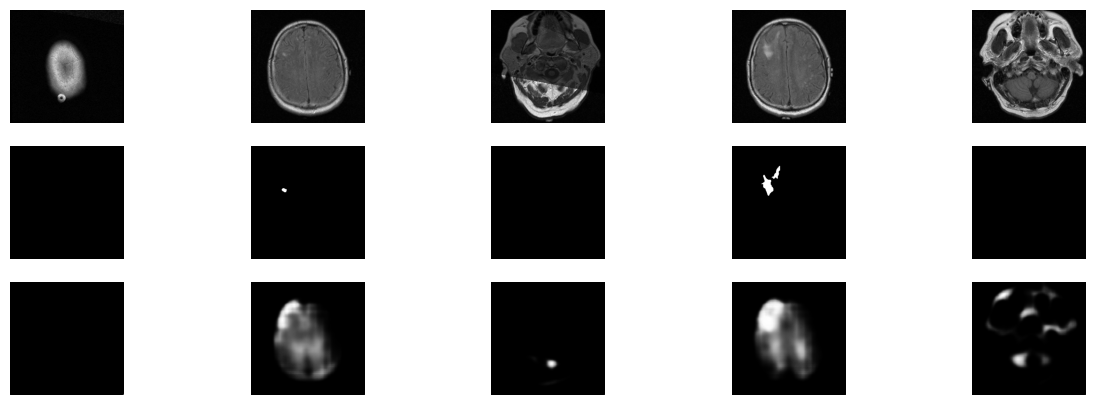

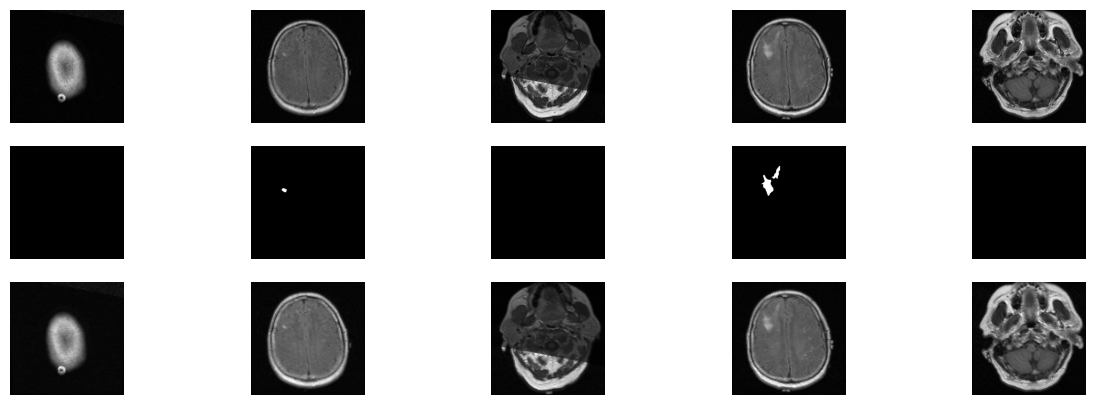

In [25]:
import matplotlib.pyplot as plt

# Function to visualize images, masks, and predictions
def visualize_results(images, true_masks, predictions, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Display original image
        plt.subplot(3, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
        
        # Display true mask
        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(true_masks[i].squeeze(), cmap='gray')
        plt.axis('off')
        
        # Display predicted mask
        plt.subplot(3, num_images, i + 1 + 2*num_images)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.axis('off')

    plt.show()

# Get predictions
nested_predictions = nested_unet_model.predict(test_images)
attention_predictions = attention_unet_model.predict(test_images)

# Visualize results for Nested U-Net
visualize_results(test_images, test_masks, nested_predictions)

# Visualize results for Attention U-Net
visualize_results(test_images, test_masks, attention_predictions)


In [26]:
# Example for calculating DICE score
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (np.sum(y_true) + np.sum(y_pred) + smooth)

# Evaluate Nested U-Net
nested_predictions = nested_unet_model.predict(test_images)
nested_dice = dice_coefficient(test_masks, nested_predictions)
print(f"Nested U-Net DICE Score: {nested_dice}")

# Evaluate Attention U-Net
attention_predictions = attention_unet_model.predict(test_images)
attention_dice = dice_coefficient(test_masks, attention_predictions)
print(f"Attention U-Net DICE Score: {attention_dice}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Nested U-Net DICE Score: 0.0995599147723294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


ValueError: operands could not be broadcast together with shapes (5,256,256,1) (5,128,128,1) 

In [27]:
# Save the best model (e.g., Nested U-Net if it's the best)
nested_unet_model.save('best_brain_mri_segmentation_model.h5')


In [28]:
print("True Masks Shape:", test_masks.shape)
print("Predicted Masks Shape:", attention_predictions.shape)


True Masks Shape: (5, 256, 256, 1)
Predicted Masks Shape: (5, 128, 128, 1)


In [29]:
from skimage.transform import resize
import numpy as np

# Assuming attention_predictions is your model's predictions
attention_predictions = attention_unet_model.predict(test_images)

# Resize the predicted masks to match the shape of the true masks
attention_predictions_resized = resize(attention_predictions, 
                                        (test_masks.shape[1], test_masks.shape[2], 1),
                                        order=1,  # Linear interpolation
                                        mode='reflect', 
                                        preserve_range=True)

# Make sure to threshold or convert to binary if needed
attention_predictions_resized = (attention_predictions_resized > 0.5).astype(np.uint8)

# Now calculate the DICE coefficient
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (np.sum(y_true) + np.sum(y_pred) + smooth)

# Calculate the DICE score
attention_dice = dice_coefficient(test_masks, attention_predictions_resized)
print(f"Attention U-Net DICE Score: {attention_dice}")


ModuleNotFoundError: No module named 'skimage'

In [30]:
pip install scikit-image


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 524.3 kB/s eta 0:00:24
   - -------------------------------------- 0.5/12.9 MB 524.3 kB/s eta 0:00:24
   - -------------------------------------- 0.5/12.9 MB 524.3 kB/s eta 0:00:24
   -- ------------------------------------- 0.8/12.9 MB 524.3 kB/s eta 0:00:24
   -- ------------------------------------- 0.8/12.9 MB 524.3 kB/s eta 0:00:24
   --- ------------------------------------ 1.0/12.9 MB 529.6 kB/s eta 0:00:23
   --- ------------------------------------ 1.0/12.9 MB 529.6 kB/s eta 0:00:23
   ---- ----------------------------------- 1.3/12.9 MB 528.2 kB/s eta 0:00:23
   ---- ----------

In [31]:
from skimage.transform import resize
import numpy as np

# Assuming attention_predictions is your model's predictions
attention_predictions = attention_unet_model.predict(test_images)

# Resize the predicted masks to match the shape of the true masks
attention_predictions_resized = resize(attention_predictions, 
                                        (test_masks.shape[1], test_masks.shape[2], 1),
                                        order=1,  # Linear interpolation
                                        mode='reflect', 
                                        preserve_range=True)

# Make sure to threshold or convert to binary if needed
attention_predictions_resized = (attention_predictions_resized > 0.5).astype(np.uint8)

# Now calculate the DICE coefficient
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (np.sum(y_true) + np.sum(y_pred) + smooth)

# Calculate the DICE score
attention_dice = dice_coefficient(test_masks, attention_predictions_resized)
print(f"Attention U-Net DICE Score: {attention_dice}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


ValueError: operands could not be broadcast together with shapes (5,256,256,1) (256,256,1,1) 

In [ ]:
# Evaluate Nested U-Net
nested_predictions = nested_unet_model.predict(test_images)

# Resize the predictions to match the shape of the true masks
nested_predictions_resized = resize(nested_predictions, 
                                     (test_masks.shape[1], test_masks.shape[2], 1),
                                     order=1,  
                                     mode='reflect', 
                                     preserve_range=True)

# Threshold or convert to binary if needed
nested_predictions_resized = (nested_predictions_resized > 0.5).astype(np.uint8)

# Calculate DICE score for Nested U-Net
nested_dice = dice_coefficient(test_masks, nested_predictions_resized)
print(f"Nested U-Net DICE Score: {nested_dice}")
